In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# from google.colab import drive
# drive.mount('/content/drive')

In [66]:
# image = cv2.imread('/content/drive/MyDrive/test_pattern.tif', cv2.IMREAD_GRAYSCALE)
image = cv2.imread('images/test_pattern.tif')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)




(-0.5, 499.5, 499.5, -0.5)

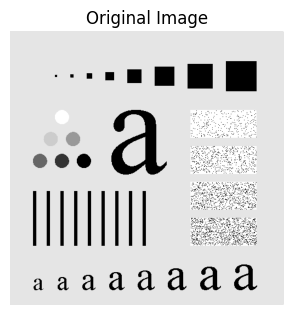

In [86]:
# Display the original image
plt.figure(figsize=(12, 12))
plt.subplot(131)
plt.imshow(image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

In [68]:
# Define custom convolution kernels
# Smoothing Kernel (Gaussian Blur)
gaussian_kernel = np.array([[1, 2, 1],
                             [2, 4, 2],
                             [1, 2, 1]]) / 16.0

In [69]:
# Sharpening Kernel (Laplacian)
laplacian_kernel = np.array([[0, -1, 0],
                              [-1, 4, -1],
                              [0, -1, 0]])



In [70]:
#Convolution function
def custom_convolve(image, kernel):
    height, width, channels = image.shape
    kernel_size = len(kernel)
    pad = kernel_size // 2
    output = np.zeros((height, width, channels), dtype=np.uint8)

    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            for c in range(channels):
                output[i, j, c] = np.sum(image[i-pad:i+pad+1, j-pad:j+pad+1, c] * kernel)

            # for k in range(kernel_size):
            #   for l in range(kernel_size):
    return output


In [71]:
# Apply custom smoothing (Gaussian Blur)
smoothed_image = custom_convolve(image, gaussian_kernel)



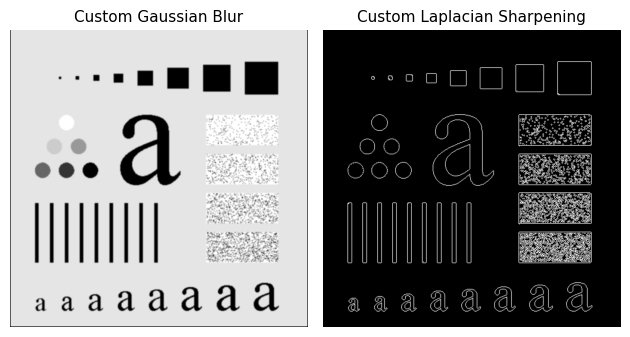

In [72]:
# Display the smoothed image
plt.subplot(1, 2, 1)
plt.imshow(smoothed_image)
plt.title('Custom Gaussian Blur', fontsize = '11')
plt.axis('off')

# Apply custom sharpening (Laplacian)
sharpened_image = custom_convolve(image, laplacian_kernel)

# Display the sharpened image
plt.subplot(1, 2, 2)
plt.imshow(sharpened_image)
plt.title('Custom Laplacian Sharpening', fontsize = '11')
plt.axis('off')
plt.tight_layout()
plt.show()

In [73]:
smooth_filter = np.array([[1, 1, 1],[1, 1, 1],[1, 1, 1]])/9


In [74]:
smooth_filter_5 = np.ones((5, 5))/9

In [75]:
sharpen_filter =  np.array([[-1, -1, -1],[-1, 8, -1],[-1, -1, 1]])/9

In [76]:
avg_img = cv2.filter2D(image,-1, smooth_filter)

### Instead of using our custom function for convolution, we can use the built-in function filter2D

In [77]:
avg_img_5 = cv2.filter2D(image, 0, smooth_filter_5)

In [78]:
sharp_img = custom_convolve(image, sharpen_filter)

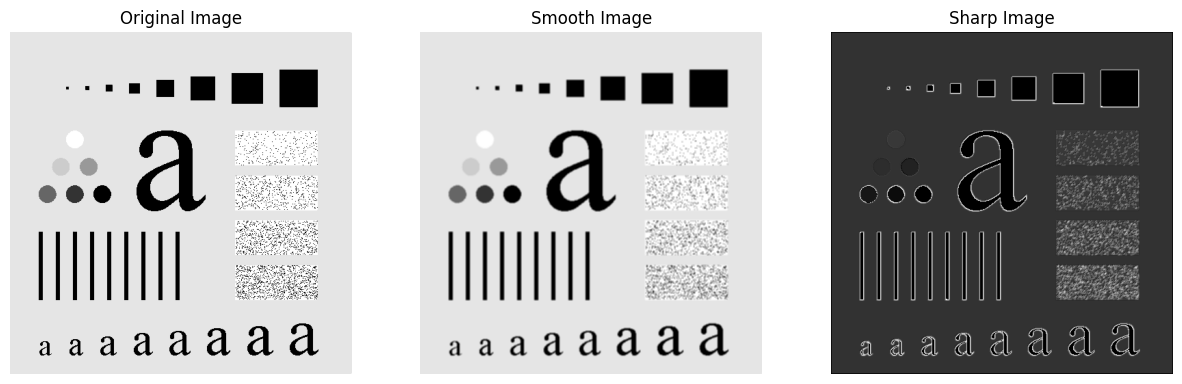

In [79]:
fig = plt.figure(figsize=(15, 5))
fig.add_subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Original Image')

fig.add_subplot(1, 3, 2)
# showing image
plt.imshow(avg_img, cmap='gray')
plt.axis('off')
plt.title('Smooth Image')

fig.add_subplot(1, 3, 3)
# showing image
plt.imshow(sharp_img, cmap='gray')
plt.axis('off')
plt.title('Sharp Image')

plt.show()

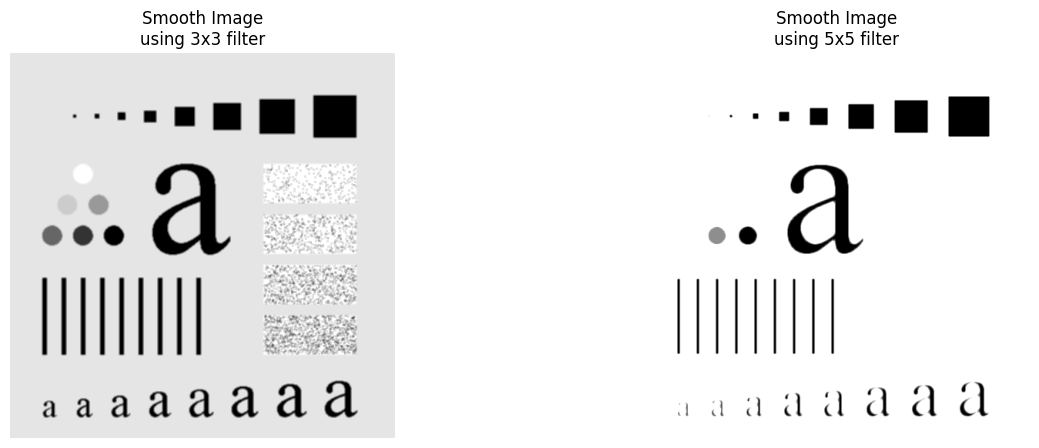

In [80]:
fig2 = plt.figure(figsize=(15, 5))
fig2.add_subplot(1, 2, 1)
plt.imshow(avg_img, cmap='gray')
plt.axis('off')
plt.title('Smooth Image\nusing 3x3 filter')

fig2.add_subplot(1, 2, 2)
# showing image
plt.imshow(avg_img_5, cmap='gray')
plt.axis('off')
plt.title('Smooth Image\nusing 5x5 filter')

plt.show()

In [81]:
board = cv2.imread('images/board.tif')
# man = cv2.imread('/content/drive/MyDrive/cameraman.jpeg')
board = cv2.cvtColor(board, cv2.COLOR_BGR2RGB)
# man = cv2.cvtColor(man, cv2.COLOR_BGR2RGB)

(-0.5, 454.5, 439.5, -0.5)

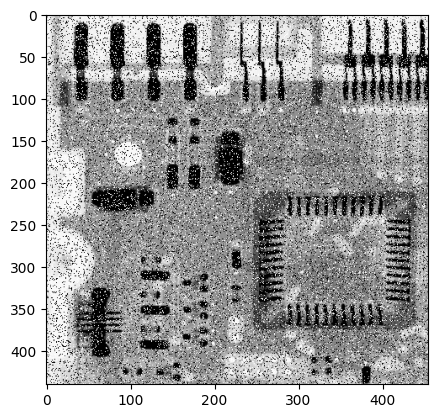

In [82]:
plt.imshow(board)
plt.axis()

In [83]:
# Function to apply median filtering
def median_filter(image, filter_size):
    height, width, channels = image.shape
    pad = filter_size // 2
    output = np.zeros((height, width, channels), dtype=np.uint8)

    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            for c in range(channels):
                # Extract the neighborhood pixels
                neighborhood = image[i-pad:i+pad+1, j-pad:j+pad+1, c]
                # Apply median operation to the neighborhood
                output[i, j, c] = np.median(neighborhood)

    return output

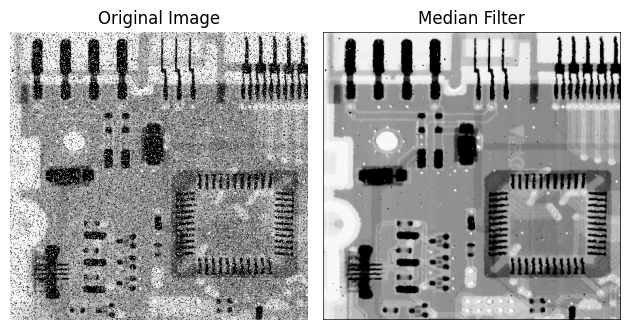

In [84]:
plt.figure()
plt.subplot(1,2, 1)
plt.imshow(board)
plt.title('Original Image')
plt.axis('off')

# Define the size of the median filter (should be an odd number)
filter_size = 3

# Apply median filtering
filtered_image = median_filter(board, filter_size)

# Display the filtered image
plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Median Filter')
plt.axis('off')

# # Display the difference between the original and filtered image
# plt.subplot(133)
# plt.imshow(np.abs(board - filtered_image))
# plt.title('Difference Image')
# plt.axis('off')

plt.tight_layout()
plt.show()